# Grunduppgift

Point 1 is Pikachu
Point 2 is Pikachu
Point 3 is Pikachu
Point 4 is Pichu


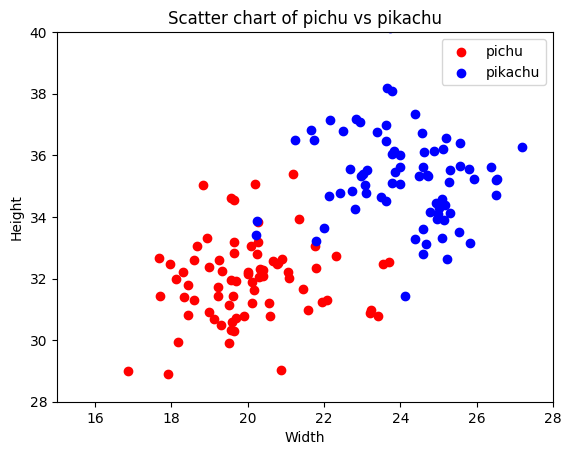

In [210]:
import csv
import matplotlib.pyplot as plt
import math

def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

def distance_formula(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def create_distance_list(test_point_width, test_point_height, pichu_or_pikachu_width, pichu_or_pikachu_height):
    distance_list = []

    if isinstance(test_point_width, list):
        # If test_point_width is a list, calculate distances for each test point in the list
        for i in range(len(test_point_width)):
            for j in range(len(pichu_or_pikachu_width)):
                distance = distance_formula(
                    test_point_width[i], test_point_height[i],
                    pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]
                )
                distance_list.append(distance)
    elif isinstance(test_point_width, float):
        # If test_point_width is a single float, calculate distances for that point
        for j in range(len(pichu_or_pikachu_width)):
            distance = distance_formula(
                test_point_width, test_point_height,
                pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]
            )
            distance_list.append(distance)

    return distance_list


def check_closest_distance(pichu_list, pikachu_list, test_points_amount):
    for i in list(range(test_points_amount)):
        new_list_pichu = pichu_list[i*(len(pichu_list)//int(test_points_amount)):(i+1)*(len(pichu_list)//int(test_points_amount))]
        new_list_pikachu = pikachu_list[i*(len(pikachu_list)//int(test_points_amount)):(i+1)*(len(pikachu_list)//int(test_points_amount))]
        new_list_pichu.sort()
        new_list_pikachu.sort()
        if new_list_pikachu[0] < new_list_pichu[0]:
            print(f'Point {i+1} is Pikachu')
        elif new_list_pikachu[0] > new_list_pichu[0]:
            print(f'Point {i+1} is Pichu')

def run_procces(file_path_1, file_path_2):
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path_1, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))

    test_point_width = []
    test_point_height = [] 

    with open(file_path_2, "r") as testfile:
        csvreader = csv.DictReader(testfile)
        for row in csvreader:
            test_point_width.append(turn_string_into_float(row["width"]))
            test_point_height.append(turn_string_into_float(row["height"]))
    
    pichu_distances = create_distance_list(test_point_width, test_point_height, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(test_point_width, test_point_height, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, len(test_point_width))

    plt.scatter(pichu_width, pichu_height, color="red",label="pichu")
    plt.scatter(pikachu_width, pikachu_height, color="blue", label="pikachu")
    plt.legend()
    plt.ylim(28, 40)
    plt.xlim(15, 28)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Scatter chart of pichu vs pikachu")

run_procces("../Data/datapoints.csv", "../Data/test_points.csv")


# Exercise 1

In [208]:
import csv
import matplotlib.pyplot as plt
import math

def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

def distance_formula(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def create_distance_list(test_point_width, test_point_height, pichu_or_pikachu_width, pichu_or_pikachu_height):
    distance_list = []

    if isinstance(test_point_width, list):
        # If test_point_width is a list, calculate distances for each test point in the list
        for i in range(len(test_point_width)):
            for j in range(len(pichu_or_pikachu_width)):
                distance = distance_formula(
                    test_point_width[i], test_point_height[i],
                    pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]
                )
                distance_list.append(distance)
    elif isinstance(test_point_width, float):
        # If test_point_width is a single float, calculate distances for that point
        for j in range(len(pichu_or_pikachu_width)):
            distance = distance_formula(
                test_point_width, test_point_height,
                pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]
            )
            distance_list.append(distance)

    return distance_list


def check_closest_distance(pichu_list, pikachu_list, test_points_amount):
    for i in list(range(test_points_amount)):
        new_list_pichu = pichu_list[i*len(pichu_list):(i+1)*len(pichu_list)]
        new_list_pikachu = pikachu_list[i*len(pikachu_list):(i+1)*len(pikachu_list)]
        new_list_pichu.sort()
        new_list_pikachu.sort()
        if new_list_pikachu[0] < new_list_pichu[0]:
            print(f'Point {i+1} is Pikachu')
        elif new_list_pikachu[0] > new_list_pichu[0]:
            print(f'Point {i+1} is Pichu')

def run_procces(file_path):
    while True:
        try:
            width_user_input = float(input("Enter your width: "))
            if width_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")

    while True:
        try:
            height_user_input = float(input("Enter your height: "))
            if height_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")
    
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))
    
    pichu_distances = create_distance_list(width_user_input, height_user_input, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(width_user_input, height_user_input, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, 1)

run_procces("../Data/datapoints.csv")


Point 1 is Pikachu


# Exercise 2

In [188]:
import csv
import matplotlib.pyplot as plt
import math

def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

def distance_formula(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def create_distance_list(test_point_width, test_point_height, pichu_or_pikachu_width, pichu_or_pikachu_height):

    distance_list = []

    for j in list(range(len(pichu_or_pikachu_width))):
        distance_list.append(distance_formula(test_point_width, test_point_height, pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]))
    return distance_list

def check_closest_distance(pichu_list, pikachu_list, test_points_amount):
    for i in list(range(test_points_amount)):
        new_list_pichu = pichu_list[i*len(pichu_list):(i+1)*len(pichu_list)]
        new_list_pikachu = pikachu_list[i*len(pikachu_list):(i+1)*len(pikachu_list)]
        new_list_pichu.sort()
        new_list_pikachu.sort()
        counter_pichu = 0
        counter_pikachu = 0
        for i in list(range(10)):
            if new_list_pikachu[i] < new_list_pichu[i]:
                counter_pikachu += 1
            elif new_list_pikachu[i] > new_list_pichu[i]:
                counter_pichu += 1
        if counter_pichu > counter_pikachu:
            print("Your point is a pichu")
        elif counter_pikachu > counter_pichu:
            print("Your point is a pikachu")
        elif counter_pikachu == counter_pichu:
            print("Your point is undetermined")

def run_procces(file_path):
    while True:
        try:
            width_user_input = float(input("Enter your width: "))
            if width_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")

    while True:
        try:
            height_user_input = float(input("Enter your height: "))
            if height_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")
    
    pichu_width = []
    pichu_height = []
    pikachu_width = [] 
    pikachu_height = []

    with open(file_path, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))
    
    pichu_distances = create_distance_list(width_user_input, height_user_input, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(width_user_input, height_user_input, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, 1)
    print(f'Your points were [{width_user_input}, {height_user_input}]')

run_procces("../Data/datapoints.csv")


Your point is a pichu
Your points were [20.5, 34.0]


# Exercise 3

Results for First 25 Test Points:

Results for Next 25 Test Points:

Counts for First 25 Test Points:
Pikachu count: 0
Pichu count: 25

Counts for Next 25 Test Points:
Pikachu count: 23
Pichu count: 2


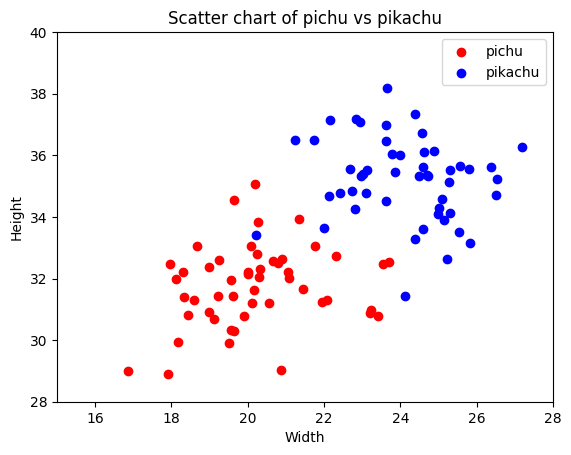

In [182]:
import csv
import matplotlib.pyplot as plt
import math
import random

def run_procces(file_path_1):
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path_1, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))

    test_point_width_pichu = []
    test_point_height_pichu = [] 
    test_point_width_pikachu = []
    test_point_height_pikachu = [] 

    for i in range(len(pichu_width)//3):
        pop_int = random.randint(0, len(pichu_width) - 1)
        test_point_width_pichu.append(pichu_width.pop(pop_int))
        test_point_height_pichu.append(pichu_height.pop(pop_int))

    for i in range(len(pikachu_width)//3):
        pop_int = random.randint(0, len(pikachu_width) - 1)
        test_point_width_pikachu.append(pikachu_width.pop(pop_int))
        test_point_height_pikachu.append(pikachu_height.pop(pop_int))

    

     # Separate the first 25 test points
    test_point_width_1 = test_point_width_pichu
    test_point_height_1 = test_point_height_pichu
    pichu_distances_1 = create_distance_list(test_point_width_1, test_point_height_1, pichu_width, pichu_height)
    pikachu_distances_1 = create_distance_list(test_point_width_1, test_point_height_1, pikachu_width, pikachu_height)
    
    # Separate the next 25 test points
    test_point_width_2 = test_point_width_pikachu
    test_point_height_2 = test_point_height_pikachu
    pichu_distances_2 = create_distance_list(test_point_width_2, test_point_height_2, pichu_width, pichu_height)
    pikachu_distances_2 = create_distance_list(test_point_width_2, test_point_height_2, pikachu_width, pikachu_height)

    print("Results for First 25 Test Points:")
    pichu_count_1, pikachu_count_1 = check_closest_distance(pichu_distances_1, pikachu_distances_1, 25)

    print("\nResults for Next 25 Test Points:")
    pichu_count_2, pikachu_count_2 = check_closest_distance(pichu_distances_2, pikachu_distances_2, 25)

    print("\nCounts for First 25 Test Points:")
    print(f'Pikachu count: {pikachu_count_1}')
    print(f'Pichu count: {pichu_count_1}')

    print("\nCounts for Next 25 Test Points:")
    print(f'Pikachu count: {pikachu_count_2}')
    print(f'Pichu count: {pichu_count_2}')

    plt.scatter(pichu_width, pichu_height, color="red",label="pichu")
    plt.scatter(pikachu_width, pikachu_height, color="blue", label="pikachu")
    plt.legend()
    plt.ylim(28, 40)
    plt.xlim(15, 28)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Scatter chart of pichu vs pikachu")



def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

def distance_formula(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


def create_distance_list(test_point_width, test_point_height, pichu_or_pikachu_width, pichu_or_pikachu_height):

    distance_list = []
    for i in list(range(len(test_point_width))):
        for j in list(range(len(pichu_or_pikachu_width))):
            distance_list.append(distance_formula(test_point_width[i], test_point_height[i], pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]))
    return distance_list

def check_closest_distance(pichu_list, pikachu_list, test_points_amount):
    pichu_count = 0
    pikachu_count = 0
    
    for i in range(test_points_amount):
        new_list_pichu = pichu_list[i*(len(pichu_list)//int(test_points_amount)):(i+1)*(len(pichu_list)//int(test_points_amount))]
        new_list_pikachu = pikachu_list[i*(len(pikachu_list)//int(test_points_amount)):(i+1)*(len(pikachu_list)//int(test_points_amount))]
        new_list_pichu.sort()
        new_list_pikachu.sort()
        if new_list_pikachu[0] < new_list_pichu[0]:
            #print(f'Point {i+1} is Pikachu')
            pikachu_count += 1
        elif new_list_pikachu[0] > new_list_pichu[0]:
            #print(f'Point {i+1} is Pichu')
            pichu_count += 1

    return pichu_count, pikachu_count


run_procces("../Data/datapoints.csv")


# Exercise 4

In [223]:
import csv
import matplotlib.pyplot as plt
import math
import random


def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

def distance_formula(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


def create_distance_list(test_point_width, test_point_height, pichu_or_pikachu_width, pichu_or_pikachu_height):
    distance_list = []

    if isinstance(test_point_width, list):
        # If test_point_width is a list, calculate distances for each test point in the list
        for i in range(len(test_point_width)):
            for j in range(len(pichu_or_pikachu_width)):
                distance = distance_formula(
                    test_point_width[i], test_point_height[i],
                    pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]
                )
                distance_list.append(distance)
    elif isinstance(test_point_width, float):
        # If test_point_width is a single float, calculate distances for that point
        for j in range(len(pichu_or_pikachu_width)):
            distance = distance_formula(
                test_point_width, test_point_height,
                pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]
            )
            distance_list.append(distance)

    return distance_list


def check_closest_distance(pichu_list, pikachu_list, test_points_amount, exercise):
    if exercise == 0:
        for i in list(range(len(test_points_amount))):
            new_list_pichu = pichu_list[i*(len(pichu_list)//int(test_points_amount)):(i+1)*(len(pichu_list)//int(test_points_amount))]
            new_list_pikachu = pikachu_list[i*(len(pikachu_list)//int(test_points_amount)):(i+1)*(len(pikachu_list)//int(test_points_amount))]
            new_list_pichu.sort()
            new_list_pikachu.sort()
        if new_list_pikachu[0] < new_list_pichu[0]:
            print(f'Point {i+1} is Pikachu')
        elif new_list_pikachu[0] > new_list_pichu[0]:
            print(f'Point {i+1} is Pichu')
    elif exercise == 1:
        for i in list(range(test_points_amount)):
            new_list_pichu = pichu_list[i*len(pichu_list):(i+1)*len(pichu_list)]
            new_list_pikachu = pikachu_list[i*len(pikachu_list):(i+1)*len(pikachu_list)]
            new_list_pichu.sort()
            new_list_pikachu.sort()
        if new_list_pikachu[0] < new_list_pichu[0]:
            print(f'Point {i+1} is Pikachu')
        elif new_list_pikachu[0] > new_list_pichu[0]:
            print(f'Point {i+1} is Pichu')
    elif exercise == 2:
        for i in list(range(test_points_amount)):
            new_list_pichu = pichu_list[i*len(pichu_list):(i+1)*len(pichu_list)]
            new_list_pikachu = pikachu_list[i*len(pikachu_list):(i+1)*len(pikachu_list)]
            new_list_pichu.sort()
            new_list_pikachu.sort()
        counter_pichu = 0
        counter_pikachu = 0
        for i in list(range(10)):
            if new_list_pikachu[i] < new_list_pichu[i]:
                counter_pikachu += 1
            elif new_list_pikachu[i] > new_list_pichu[i]:
                counter_pichu += 1
        if counter_pichu > counter_pikachu:
            print("Your point is a pichu")
        elif counter_pikachu > counter_pichu:
            print("Your point is a pikachu")
        elif counter_pikachu == counter_pichu:
            print("Your point is undetermined")
    elif exercise == 3:
        pichu_count = 0
        pikachu_count = 0
        
        for i in range(test_points_amount):
            new_list_pichu = pichu_list[i*(len(pichu_list)//int(test_points_amount)):(i+1)*(len(pichu_list)//int(test_points_amount))]
            new_list_pikachu = pikachu_list[i*(len(pikachu_list)//int(test_points_amount)):(i+1)*(len(pikachu_list)//int(test_points_amount))]
            new_list_pichu.sort()
            new_list_pikachu.sort()
            if new_list_pikachu[0] < new_list_pichu[0]:
                #print(f'Point {i+1} is Pikachu')
                pikachu_count += 1
            elif new_list_pikachu[0] > new_list_pichu[0]:
                #print(f'Point {i+1} is Pichu')
                pichu_count += 1

        return pichu_count, pikachu_count

def run_procces_0(file_path_1, file_path_2):
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path_1, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))

    test_point_width = []
    test_point_height = [] 

    with open(file_path_2, "r") as testfile:
        csvreader = csv.DictReader(testfile)
        for row in csvreader:
            test_point_width.append(turn_string_into_float(row["width"]))
            test_point_height.append(turn_string_into_float(row["height"]))
    
    pichu_distances = create_distance_list(test_point_width, test_point_height, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(test_point_width, test_point_height, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, len(test_point_width), 0)

    plt.scatter(pichu_width, pichu_height, color="red",label="pichu")
    plt.scatter(pikachu_width, pikachu_height, color="blue", label="pikachu")
    plt.legend()
    plt.ylim(28, 40)
    plt.xlim(15, 28)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Scatter chart of pichu vs pikachu")

def run_procces_1(file_path):
    while True:
        try:
            width_user_input = float(input("Enter your width: "))
            if width_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")

    while True:
        try:
            height_user_input = float(input("Enter your height: "))
            if height_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")
    
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))
    
    pichu_distances = create_distance_list(width_user_input, height_user_input, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(width_user_input, height_user_input, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, 1, 1)

def run_procces_2(file_path):
    while True:
        try:
            width_user_input = float(input("Enter your width: "))
            if width_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")

    while True:
        try:
            height_user_input = float(input("Enter your height: "))
            if height_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")
    
    pichu_width = []
    pichu_height = []
    pikachu_width = [] 
    pikachu_height = []

    with open(file_path, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))
    
    pichu_distances = create_distance_list(width_user_input, height_user_input, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(width_user_input, height_user_input, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, 1, 1)
    print(f'Your points were [{width_user_input}, {height_user_input}]')

def run_procces_3(file_path):
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))

    test_point_width_pichu = []
    test_point_height_pichu = [] 
    test_point_width_pikachu = []
    test_point_height_pikachu = [] 

    for i in range(len(pichu_width)//3):
        pop_int = random.randint(0, len(pichu_width) - 1)
        test_point_width_pichu.append(pichu_width.pop(pop_int))
        test_point_height_pichu.append(pichu_height.pop(pop_int))

    for i in range(len(pikachu_width)//3):
        pop_int = random.randint(0, len(pikachu_width) - 1)
        test_point_width_pikachu.append(pikachu_width.pop(pop_int))
        test_point_height_pikachu.append(pikachu_height.pop(pop_int))

    

     # Separate the first 25 test points
    test_point_width_1 = test_point_width_pichu
    test_point_height_1 = test_point_height_pichu
    pichu_distances_1 = create_distance_list(test_point_width_1, test_point_height_1, pichu_width, pichu_height)
    pikachu_distances_1 = create_distance_list(test_point_width_1, test_point_height_1, pikachu_width, pikachu_height)
    
    # Separate the next 25 test points
    test_point_width_2 = test_point_width_pikachu
    test_point_height_2 = test_point_height_pikachu
    pichu_distances_2 = create_distance_list(test_point_width_2, test_point_height_2, pichu_width, pichu_height)
    pikachu_distances_2 = create_distance_list(test_point_width_2, test_point_height_2, pikachu_width, pikachu_height)

    pichu_count_1, pikachu_count_1 = check_closest_distance(pichu_distances_1, pikachu_distances_1, 25, 3)
    pichu_count_2, pikachu_count_2 = check_closest_distance(pichu_distances_2, pikachu_distances_2, 25, 3)

    print("\nCounts for Pichu Test Points:")
    print(f'False Negative (Pikachu): {pikachu_count_1}')
    print(f'True Negative (Pichu): {pichu_count_1}')

    print("\nCounts for Pikachu Test Points:")
    print(f'True Positive (Pikachu): {pikachu_count_2}')
    print(f'True Negative (Pichu): {pichu_count_2}')

    # plt.scatter(pichu_width, pichu_height, color="red",label="pichu")
    # plt.scatter(pikachu_width, pikachu_height, color="blue", label="pikachu")
    # plt.legend()
    # plt.ylim(28, 40)
    # plt.xlim(15, 28)
    # plt.xlabel("Width")
    # plt.ylabel("Height")
    # plt.title("Scatter chart of pichu vs pikachu")


def main():
    user_input_exercise = int(input("Enter the number for the exercise: "))
    if user_input_exercise == 0:
        run_procces_0("../Data/datapoints.csv", "../Data/test_points.csv")
    elif user_input_exercise == 1:
        run_procces_1("../Data/datapoints.csv")
    elif user_input_exercise == 2:
        run_procces_2("../Data/datapoints.csv")
    elif user_input_exercise == 3:
        run_procces_3("../Data/datapoints.csv")

main()

TypeError: object of type 'int' has no len()